# Plotting Lines (2D Hyperplanes) CHECK
This exercises is to help you figure out how to plot a line using matplotlib for visualizing linear decision boundaries.
First lets plot som example data and an arbitrary hyperplane (line) so we can see the gist of visualizing data and a hyperplane.

x1 [[0.34967142 0.28617357]
 [0.36476885 0.45230299]
 [0.27658466 0.2765863 ]
 [0.45792128 0.37674347]
 [0.25305256 0.354256  ]
 [0.25365823 0.25342702]
 [0.32419623 0.10867198]
 [0.12750822 0.24377125]
 [0.19871689 0.33142473]
 [0.20919759 0.15876963]
 [0.44656488 0.27742237]
 [0.30675282 0.15752518]
 [0.24556173 0.31109226]
 [0.18490064 0.3375698 ]
 [0.23993613 0.27083063]
 [0.63982934 0.88522782]
 [0.69865028 0.59422891]
 [0.78225449 0.57791564]
 [0.72088636 0.50403299]
 [0.5671814  0.71968612]
 [0.77384666 0.71713683]
 [0.68843517 0.66988963]
 [0.5521478  0.62801558]
 [0.65393612 0.80571222]
 [0.73436183 0.52369598]
 [0.7324084  0.66149177]
 [0.6323078  0.76116763]
 [0.80309995 0.79312801]
 [0.61607825 0.66907876]
 [0.73312634 0.79755451]]
y1 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
y1 nog [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


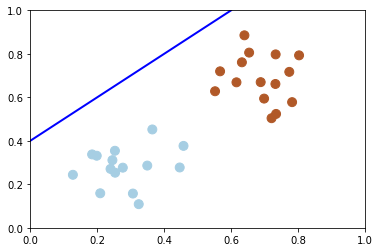

In [4]:
# Enable plotting directly in the notebook
%matplotlib inline
# import NumPy and MatplotLib pyplot
import numpy as np
import matplotlib.pyplot as plt
# Generate simple data set
from sklearn.datasets import make_blobs
centers = [(0.3, 0.3), (0.7, 0.7)]
n_samples = 30
X1, Y1 = make_blobs(n_samples=n_samples, n_features=2, cluster_std=0.1, centers=centers, shuffle=False, random_state=42)
print("x1",X1)
print("y1",Y1)
Y1 = Y1 * 2 - 1
print("y1 nog",Y1)

# To plot a point set we use the scatter plot functionality and set the color of each point according to the labels. 
# For the color of each point we use the label.
# For more info on scatter plots we can simply write "plt.scatter?" in the cell below or in ipython.
plt.axis([0, 1, 0, 1])
plt.scatter(X1[:, 0], X1[:, 1], c=Y1, cmap=plt.cm.Paired, s=80)

# Here we use the 'plt.plot' command. 
# It takes a list of x coordinates, a list of y coordinates and some style options.
# In '-b' the '-' means to connect the points and 'b' means blue. 
# Linewidth is, wait for it... the width of the line.
plt.plot([0,0.6], [0.4,1], '-b', linewidth=2.0)

plt.show()

# Can you guess how you can view the docmumentation of the 'plot' command? 
# Hint, try write: plt.plot?

## 2. a) More about Plotting Hyperplanes
It is possible to represent a $d$ dimensional hyperplane by a vector $w\in\mathbb{R}^{d+1}$ as the set of points

$$S=\{z\in \{1\}\times \mathbb{R}^{d} \mid w^\intercal z=0\}$$

Note that we have prependet the constant 1 to all data points, adding one dimension to the initial data point.
For instance if we had $z=(z_1, z_2)\in \mathbb{R}^2$, we get the data point $(1, z_1, z_2)$, and $w^\intercal z = w_0 \cdot 1 + w_1 \cdot z_1 + w_2 \cdot z_2 = \sum_{i=0}^2 z_i \cdot w_i $

In this course we will often be interested in plotting a hyperplane represented by a vector $w$. In the above section we learned how to plot a line between two points. Our goal is thus to determine two points on the boundary of the plot so we can plot the hyperplane!

Let's start by looking at an example. Say we are given a hyperplane represented by $w=[0, 1, 1]$ we want to plot in the range $R=[-1,1]\times [-1, 1]$. Remember that $w^\intercal z=0$ means that $z$ is orthogonal with $w$. The goal is then to find the points on the boundary of $R$ that are orthogonal to $w$. If you draw the vector $w$ by hand it is easy to see the orthogonal points on $R$ are $(-1, 1)$ and $(1, -1)$. 

The following code draws the line represented by the hyperplane $w=[0, 1, 1]$. 

<!-- 

What we learned above is how to plot a line between two points. So what we really need is to determine two points on the boundary of the plot.

 Say we have a hyperplane $w=[0,1,1]$. Since the first coordinate of $w$ is 0, this means that the hyperplane is a line through the origin. (Recall that the origin is given as (1,0,0) after introducing the dummy coordinate).
This corresponds to the equation $x_1 +x_2 = 0$. How can we plot this in the input range $R = [-1,1] \times [-1,1]$ ?
We need to plot the set of points in $R$ that are orthogonal to $w$. For this simple case it is easy to see that the line goes through the two corners (-1,1) and (1,-1) of the input range. So the intersection of the line with the input range is exactly the line between these corners. Let's code that.

-->

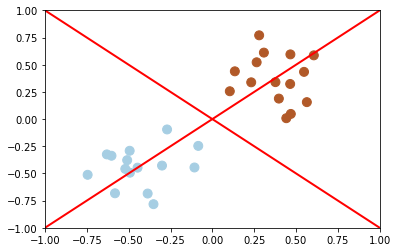

In [6]:
# The points from previous exercise are in [0,1]x[0,1]. 
# Rescale them to R=[-1,1]x[-1,1]
X1r = X1.copy()
#print(X1)
X1r[:,0] = X1r[:,0]*2 -1
X1r[:,1] = X1r[:,1]*2 -1
plt.axis([-1, 1, -1, 1])
#print(X1r)

# Plot points
plt.scatter(X1r[:,0],X1r[:,1],c=Y1,cmap=plt.cm.Paired,s=80)

# Plot hyperplane
plt.plot([-1,1],[-1,1],'-r',linewidth=2)
plt.plot([-1,1],[1,-1],'-r',linewidth=2)
plt.show()



<b>Question 1: </b><br>
Consider any hyperplane that can be represented by a vector $w=[0, w_1, w_2]$. Will any such hyperplane cross the origin $O=[1, 0, 0]$?
0 vector?

<b>Question 2: </b><br>
Consider any hyperplane that can be represented by the vector $w=[0,w_1,w_2]$ that is <b>not</b> the vertical line. <br>
How can we find two points on the boundary $R=[-1,1]\times[-1,1]$ that the hyperplane cross?

HINT: $R$ is a square and has 4 boundaries (line segments). Consider extending each boundary/line segment as the lines $x=-1, x=1, y=1, y=-1$ and computing intersections with the hyperplane. You want to draw this so you can see what is happening.   


## 2. b) Making plotting easier
To make the task of plotting a hyperplane a little easier, we may instead take advantage of the fact the MatplotLib does automatic clipping. This means we may choose two points on the hyperplane which is outside the input range. 


Suppose that the input range is $R= [0,1] \times [0,1]$ again. Suppose the hyperplane is not vertical. Then it must intersect any vertical line. Consider the two vertical lines $x_1 = 0$ and $x_1 = 1$. The intersection points of $x_1$ and the hyperplane are now sufficient to draw the hyperplane.  

## Task 1:
Plot the hyperplane represented by $w=[-1.0,1.0,1.0]$ in the range $[0,1] \times [0,1]$.

Fill the code in the function **plot_hyplerplane_example** and run the cell to test.
    

HINT: Find the $x_2$-coordinate for the hyperplane (line) at $x_1=0$ and at $x_1=1$. You need to solve the hyperplane equation to do this

$$w^\intercal x =w_0 \cdot 1 + w_1 \cdot x_1 + w_2 \cdot x_2 = 0$$

If you know all but one variable you should be able to find the other.




[1. 0.]


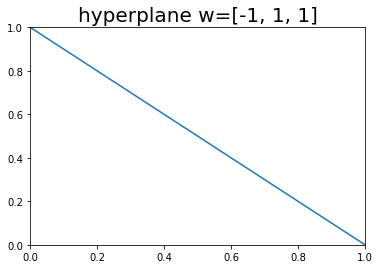

In [7]:
def plot_hyperplane_example():
    """  
    Plot the hyperplane represented by w = [−1.0, 1.0, 1.0] in the range [0,1]x[0,1]. 
    Approach: 
    Find the x2-coordinate for the hyperplane (line) at x1=0 and at x1=1.
    You need to solve the hyperplane equations to do it: w^T * x = w0*1 + w1*x1 + w2*x2 = 0 
    If you know all but one variable you should be able to solve it.
    
    Write code here to create two NumPy arrays x and y that contain the x and y coordinates of the two endpoints of the line to be drawn.
    """
    
    #dus omdat je het zoekt in inteval 0 en 1 zoek je de intersecties waarbij geld dat product 0  is
    w=np.array([-1,1,1])
    
    x = np.array((0,1))
    y = np.array((-w[0]/w[2],-(w[0]+w[1])/w[2])) #x1 is 0 en x2 is1
    print(y)
    ### YOUR CODE HERE 2 lines
    ### END CODE 
    
    plt.axis([0, 1, 0, 1])
    plt.plot(x,y)
    plt.title('hyperplane w={0}'.format([-1, 1, 1]), fontsize=20)
    plt.show()
    
plot_hyperplane_example()

## Task 2:

Consider plotting a generic hyperplane $w=(w_0,w_1,w_2)$ in the range $R=[x_\min,x_\max] \times [y_\min,y_\max]$. The hyperplane equation is now

$$w^\intercal x=w_0+w_1x_1+w_2x_2=0$$

Complete the function **make_hyperplane**  Test the function with test_hyperplane

HINT: How can we find two points (outside $R$) that the hyperplane goes through? Try set $x_2=y_{min}$ and then $x_2=y_{max}$. Could you do something similar for $x_1$?

HINT: Can you think of any special cases (maybe check you don't divide by zero)?  


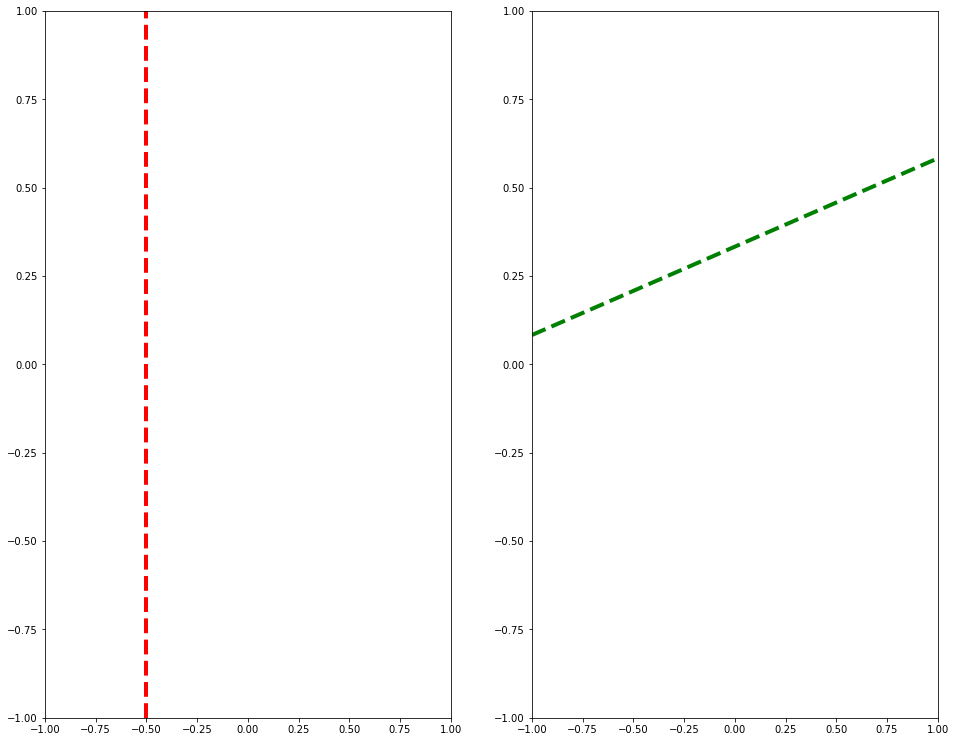

In [25]:
def make_hyperplane(w, ax):
    """ 
    Construct the hyperplane (line) w0 + w1*x1 + w2*x2 = 0 in the range R = [xmin,xmax] times [ymin,ymax] for a generic w = (w0,w1,w2).
    
    We will proceed in a similar fashion as we did in the previous task.
    There we had xmin = ymin = 0 and xmax = ymax = 1 (i.e. the range was [0,1]x[0,1]), and we just found the intersection points of the hyperplane with the two vertical lines x1=0 and x1=1. 
    How can we find these two points for a generic w = (w0,w1,w2) and a generic range ([xmin,xmax] x [ymin,ymax])?
 
    Remember to handle possible special cases! 
    

    Args:
    w: numpy array shape (d,)
    ax: axis object (to plot on)
    return x, y
    """
    
    if w[1]==0 and w[2]==0:
        print('Invalid hyperplane')
        return None, None 
    # Notice that w1 and w2 are not allowed to be 0 simultaneously, but it may be the case that one of them equals 0
    
    xmin, xmax, ymin, ymax = ax.axis()
    
    # Write the code here to create two NumPy arrays called x and y.
    # The arrays x and y will contain the x1's and x2's coordinates of the two endpoints of the line, respectively.
    if w[2]==0: #vertikaal
        x = np.array((-w[0]/w[1],-w[0]/w[1]))
        y = np.array((ymin,ymax))
    
        return x, y
    
    x = np.array((xmin,xmax))
    y = np.array((-(w[1]*xmin+w[0])/w[2],-(w[1]*xmax+w[0])/w[2]))
                
    return x, y
def test_hyperplane():
    fig, ax = plt.subplots(1, 2, figsize=(16, 13))
    # plt.axis([-1, 1, -1, 1])
    ax[0].axis([-1, 1, -1, 1])
    ax[1].axis([-1, 1, -1, 1])
    x1, y1 = make_hyperplane((1, 2, 0), ax[0])
    ax[0].plot(x1, y1, 'r--', linewidth=4)
    x2, y2 = make_hyperplane((1, 0.75, -3), ax[1])
    ax[1].plot(x2, y2, 'g--', linewidth=4)
    plt.show()

test_hyperplane()


#special case: y= (w1-w0)/w2

#W0+W1*X=0 dan -w0/W1

## Task 3:
Now that we know how to plot hyperplanes we continue to implementing the pocket perceptron learning algorithm.
We have provided starter code in **perceptron.py**

- Copy your make_hyperplane solution to perceptron.py 
- Finish the PerceptronClassifier, implement predict, score, fit in that order
- Test by your implementation with python3 perceptron.py -test
- See an animation of the perceptron on an easy data set with  python3 perceptron.py -easy (if the figures are to small/to large you can change the figsize in the run_animation, first line)
- See an animation of the perceptron on a harder data set with  python3 perceptron.py -hard (data is random here so different results from every run)
